# Notes

XXX

In [1]:
import os 
import re
import csv
import json
from datetime import datetime

import math
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Constants

In [2]:
dir_data_root = os.path.join('..', 'data')
dir_exercises = os.path.join(dir_data_root, 'json', 'exercises_raw')
dir_patiens_sessions = os.path.join(dir_data_root, 'json', 'patients_sessions')

# Patient sessions

In [3]:
#Read patient data one by one and add to one frame
patients_sessions = {}
for file_name in os.listdir(dir_patiens_sessions):
    if file_name == '.DS_Store': continue
        
    id = file_name.split('.')[0]
    sessions = json.load(open(os.path.join(dir_patiens_sessions, file_name), 'r'))
    patients_sessions[id] = sessions
    

In [4]:
print('Overal number of patients: %s' % len(patients_sessions))

Overal number of patients: 144


In [5]:
print('Overal number of sessions: %s' % (sum([len(s) for pid, s in patients_sessions.items()])))

Overal number of sessions: 247


In [6]:
dates = []
for patient_id, sessions in patients_sessions.items():
    dates += [x['exercise_dates'] for x in sessions]
    
dates.sort()
print('Data collection started on: %s collected till: %s' % (dates[0], dates[-1]))

Data collection started on: 2019-01-22 collected till: 2022-11-10


In [7]:
i = 0
for patient_id, sessions in patients_sessions.items():
    evaluations = [session['evaluation'] for session in sorted(sessions, key=lambda x: x['exercise_dates'])]
    if len(sessions) != 1:  continue
    #print('Patient: %s, number of sessions: %s, evaluations: %s' % (patient_id, len(sessions), ' '.join(map(str, evaluations))))
    print(patient_id)
    i += 1

print(i)

00000000082
00000000094
00000000057
00000000112
00000000153
00000000104
00000000036
00000000124
00000000149
00000000148
00000000076
00000000125
00000000037
00000000040
00000000105
00000000152
00000000144
00000000056
00000000113
00000000083
00000000129
00000000030
00000000122
00000000088
00000000134
00000000118
00000000092
00000000051
00000000143
00000000155
00000000046
00000000103
00000000011
00000000154
00000000050
00000000115
00000000139
00000000119
00000000027
00000000066
00000000049
00000000008
00000000136
00000000065
00000000032
00000000045
00000000069
00000000091
00000000029
00000000117
00000000140
00000000005
00000000044
00000000033
00000000048
00000000106
00000000043
00000000055
00000000079
00000000096
00000000080
00000000038
00000000059
00000000022
00000000075
00000000130
00000000126
00000000034
00000000127
00000000074
00000000058
00000000039
00000000081
00000000150
74


# Print all

In [9]:
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')

In [22]:
nonmonotonic_patients = set([
    '00000000086',
    '00000000028',
    '00000000078',
    '00000000020',
    '00000000047',
    '00000000010',
    '00000000070',
    '00000000073',
    '00000000012'
])

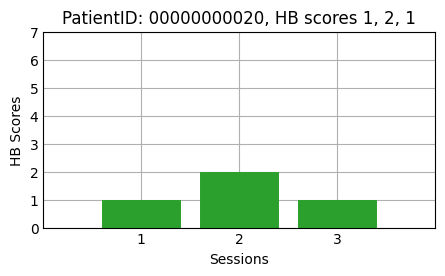

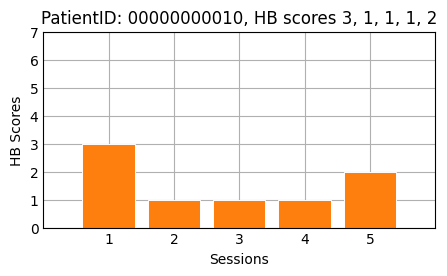

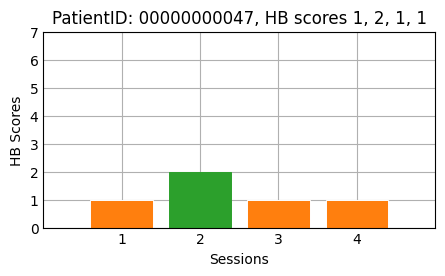

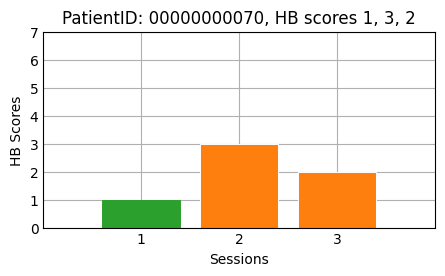

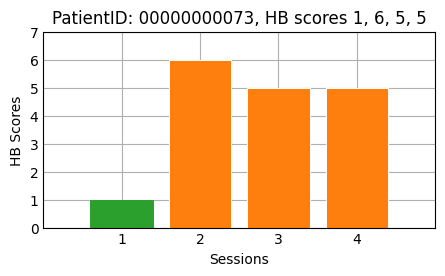

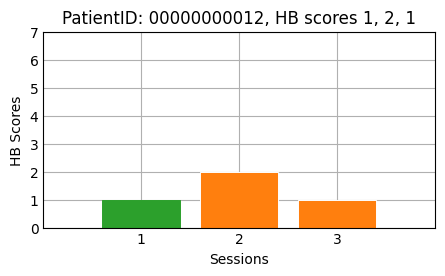

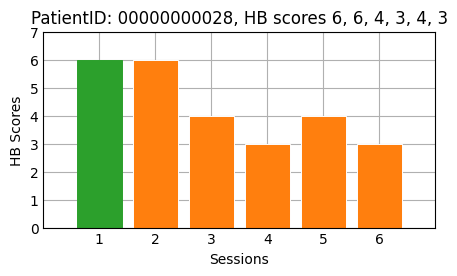

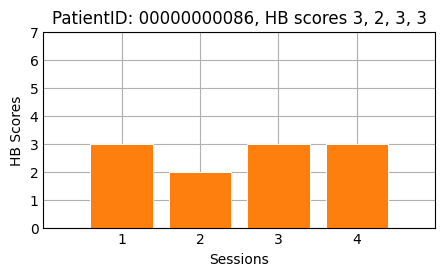

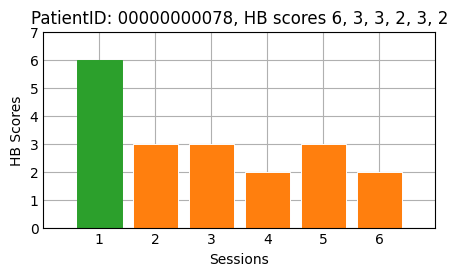

In [24]:
for patient_id, sessions in patients_sessions.items():
    
    if patient_id not in nonmonotonic_patients: continue
    evaluations = []
        
    evaluations = [session['evaluation'] + 1 for session in sorted(sessions, key=lambda x: x['exercise_dates'])]
    operation_flag = [session['flag_before_surgery'] for session in sorted(sessions, key=lambda x: x['exercise_dates'])]

    fig, ax = plt.subplots(figsize=(4,2)) 

    x = 1 + np.arange(len(evaluations))

    bars = ax.bar(x, evaluations, color='tab:orange', edgecolor='white', linewidth=0.7)
    
    for indx, flag in enumerate(operation_flag):
        if flag:
            bars[indx].set_color('tab:green')
    

    ax.set(
        xlim=(0, len(sessions) + 1), 
        ylim=(0, 7),
        xticks=np.arange(1, len(sessions) + 1),
        xlabel='Sessions',
        ylabel='HB Scores',
        title='PatientID: %s, HB scores %s' % (patient_id, ', '.join(map(str, evaluations)))
    )

plt.show() 

In [ ]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
s1 = np.array([0., 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0])
s2 = np.array([0., 1, 2, 3, 1, 0, 0, 0, 2, 1, 0, 0, 0])
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path, filename="warp.png")